![alt text](airbnb.webp)

# **Optimizing Airbnb Listings in Bangkok: Insights on Location, Pricing, Occupancy, and Effective Descriptions**

By: Sultan Pasya

## **Overview:**
- Business Understanding
- Data Understanding and Data Cleaning
- Data Analysis
- Key Recommendations
- References

## **Business Understanding**

### **Background**

As Bangkok's tourism industry continues to thrive, Airbnb has emerged as a leading platform for travelers seeking unique and affordable accommodations. However, with the increasing number of listings, hosts face challenges in setting competitive prices, understanding market dynamics, and optimizing their listings to maximize occupancy. This analysis leverages data-driven insights to help Airbnb hosts in Bangkok navigate the complexities of the market. By analyzing key factors such as geospatial competition, pricing trends, occupancy rates, and the influence of language and keywords used in listing description, this study provides actionable strategies for hosts to enhance their listings, attract more guests, and increase their revenue.

### **Problems to Address**

1. **Geospatial Competition and Density:** How do the density and geographic distribution of listings affect competition among Airbnb hosts across different neighbourhoods in Bangkok?

2. **Seasonal Trends and Pricing:** What are the seasonal trends in listing availability and pricing, and how can Airbnb partners adjust their strategies to maximize occupancy throughout the year?

3. **Optimal Minimum Nights Policy:** What is the impact of minimum night stay policies on booking frequency and revenue, and how can Airbnb partners optimize this setting?

4. **Language and Keyword Impact:** How do the language, sentiment, and keywords used in listing descriptions influence booking rates, review counts, and pricing?

## **Data Understanding and Data Cleaning**

Before conducting any data analysis, it is essential to thoroughly understand and prepare the dataset. This involves examining the structure, identifying variable types, and checking for missing or inconsistent data. After gaining initial insights through descriptive statistics, data cleaning is performed to address any issues, such as missing values or inconsistencies. This ensures the dataset is accurate, complete, and ready for reliable analysis.

### **Importing Libraries and Dataset**

To begin the analysis, let's first import the necessary libraries.

#### **Importing Libraries and Initial Setup**

In [1]:
# Importing required libraries

# Library for data cleaning and data manipulation
import pandas as pd
import numpy as np

# Library for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd

# Library for normality test
import scipy.stats as stats

# Library for text analysis
import re
from collections import Counter
import string

# Other libraries
import warnings
warnings.filterwarnings("ignore")

- **Pandas** and **NumPy** are utilized for data cleaning and manipulation, enabling efficient handling of datasets.
- For data visualization, **Seaborn**, **Matplotlib**, and **Folium** are used to create insightful graphs and interactive maps.
- Additionally, **warnings** are suppressed to maintain a clean output.

#### **Loading the Dataset**

The dataset, "**Airbnb Listings Bangkok**," is then loaded using Pandas, followed by a quick review of the initial and last few rows to get a preliminary understanding of its structure and contents.

In [2]:
# Loading the dataset
df = pd.read_csv("Airbnb Listings Bangkok.csv")

# Quick review of the initial and last data in the dataset
display(df.head(), df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


A quick overview reveals some missing values (NaN) in the **'last_review'** and **'reviews_per_month'** columns. Additionally, the **'name'** column contains non-Latin characters.

#### **Data Dictionary Overview**

To better understand the dataset, a Data Dictionary is provided. This dictionary details the features of the dataset, including their descriptions and possible values. This reference is crucial as it guides the interpretation of the data and ensures that the subsequent analysis is accurate and contextually relevant.

These are the columns in the dataset, with their descriptions listed below:

| Feature                         | Description                                                                 |
|---------------------------------|-----------------------------------------------------------------------------|
| `id`                            | Airbnb's unique identifier for the listing.                                 |
| `name`                          | Name of the listing.                                                        |
| `host_id`                       | Airbnb's unique identifier for the host/user.                               |
| `host_name`                     | Name of the host, usually just the first name(s).                           |
| `neighbourhood`                  | The neighbourhood is geocoded using latitude and longitude.                  |
| `latitude`                      | Latitude of the listing (WGS84 projection).                                 |
| `longitude`                     | Longitude of the listing (WGS84 projection).                                |
| `room_type`                     | Type of room: Entire home/apt, Private room, Shared room, or Hotel.         |
| `price`                         | Daily price in local currency.                                              |
| `minimum_nights`                | Minimum number of nights for a stay.                                        |
| `number_of_reviews`             | Total number of reviews the listing has.                                    |
| `last_review`                   | Date of the last/newest review.                                             |
| `calculated_host_listings_count`| Number of listings the host has in the city/region.                         |
| `availability_365`              | Number of days the listing is available in the next 365 days.               |
| `number_of_reviews_ltm`         | Number of reviews in the last 12 months.                                    |


### **Data Summarization**


To gain a comprehensive understanding of the dataset, data summarization is performed. First, let's find out the number of rows and columns from the dataset.

In [3]:
f"The number of rows and columns are {df.shape}"

'The number of rows and columns are (15854, 17)'

We've identified that the dataset contains 15,854 rows and 17 columns. Next, let's examine the columns and the summary of the dataset.

In [4]:
# Examining the columns
df.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [5]:
# Examining the summary of the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

The initial examination of the dataset revealed several key points:

- Among the 17 columns, 12 are numerical (int64 and float64 data types), while the remaining 5 are categorical (object data type).
- Some columns contain missing data, including **'name'**, **'host_name'**, **'last_review'**, and **'reviews_per_month'**, as their non-null counts are lower than the total 15,854 entries. These missing values will be addressed after reviewing unique values and handling any duplicate entries.
- An anomaly was detected in the data types, particularly in the **'last_review'** column, which is currently classified as an object type. This column requires conversion to a datetime format, and this correction will be made during further data processing.

### **Checking Unique Values**

First, let's determine the number of unique entries in the dataset.

In [6]:
# Checking unique values across features

pd.DataFrame({
    "feature/column": df.columns.values,
    "data_type": df.dtypes.values,
    "negative_values": [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns],
    "number_of_unique_values": df.nunique().values,
    "unique_values": [df[col].unique() for col in df.columns]
})

,feature/column,data_type,negative_values,number_of_unique_values,unique_values
0,Unnamed: 0,int64,False,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,id,int64,False,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, ..."
2,name,object,False,14794,"[Nice room with superb city view, Easy going l..."
3,host_id,int64,False,6659,"[120437, 120541, 123784, 153730, 610315, 21296..."
4,host_name,object,False,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimo..."
5,neighbourhood,object,False,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, B..."
6,latitude,float64,False,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76..."
7,longitude,float64,False,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 1..."
8,room_type,object,False,4,"[Entire home/apt, Private room, Hotel room, Sh..."
9,price,int64,False,3040,"[1905, 1316, 800, 1286, 1000, 1558, 1461, 700,..."


From the observations above, several key insights can be derived:

- **Dataset Size & Uniqueness:** The dataset contains 15,854 listings with unique id values, and 6,659 unique hosts, indicating multiple listings per host.
- **Diverse Locations & Room Types:** There are 50 unique neighbourhoods and 4 room types, providing a broad geographic and accommodation type coverage.
- **Price Range:** The price column has 3,040 unique values, showing a wide variation in listing prices.
- **Review Activity:** There are 298 unique values in the **'number_of_reviews'**, reflecting diverse levels of customer engagement.
- **Host Activity:** Hosts manage multiple listings, as indicated by 50 unique values in the **'calculated_host_listings_count'**.

### **Checking Duplicated Data**

Next, let's identify any duplicated data that may exist and address it if found.

In [7]:
# Checking for duplicated entries across the entire dataset.
df.duplicated().sum()

np.int64(0)

In [8]:
# Specifically, we'll check for duplicates using the 'id' column, as each listing should have a unique identifier.
df.duplicated(["id"]).sum()

np.int64(0)

We've confirmed that no duplicate entries are present in the dataset.

### **Checking Anomalies**

To check anomalies and outliers, let's perform descriptive statistics, as it is crucial for understanding the overall distribution of data. This step helps in identifying anomalies, which are important to ensure accurate and reliable analysis.

In [9]:
# Descriptive statistics of numerical data
df.describe()

# Descriptive statistics of categorical data
df.describe(include=["object"])

# Displaying both statistics
display(df.describe(),df.describe(include=["object"]))

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


- The descriptive statistics reveal an anomaly in the 'price' feature, where the minimum value is 0. Logically, a rent price of 0 is implausible.
- Additionally, the 'minimum_nights' feature displays a wide range, with a minimum of 1 and a maximum of 1125. Notably, the third quartile (Q3) is only 7, indicating the presence of significant outliers.
- Other features might also contain outliers, which will be addressed later based on further analysis.

#### **Handling Anomaly**

Having identified the only anomaly as instances where the **'price'** is 0, let's examine this further.

In [10]:
df[df["price"] == 0]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,NaN,NaN,1,0,0


The examination discovered that index 11103 contains a value of 0 in the 'price' column. The next step is to remove this row.

In [11]:
df.drop(index=11103, inplace=True)

Let's verify whether the row has been successfully removed.

In [12]:
display(df.shape, df[df["price"] == 0])

(15853, 17)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


As observed, the total number of rows has decreased by 1 from the original count of 15,854. Additionally, querying for a price of 0 now returns no results

### **Checking Missing Values**


Before proceeding with the analysis, it is crucial to identify any missing values within the dataset. Missing data can impact the accuracy of the analysis and the validity of the insights drawn. By examining the extent and pattern of missing values, the most appropriate strategy for handling them can be determined, ensuring that the dataset remains robust and reliable for further analysis.

In [13]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5789
reviews_per_month                 5789
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [14]:
# Calculating the percentage of missing values from every columns
df_miss_percent = round(df.isna().sum() * 100/len(df), 2)
df_miss_percent.to_frame().rename(columns={0:"Percentage of Missing values"}).reset_index()

,index,Percentage of Missing values
0,Unnamed: 0,0.00
1,id,0.00
2,name,0.05
3,host_id,0.00
4,host_name,0.01
5,neighbourhood,0.00
6,latitude,0.00
7,longitude,0.00
8,room_type,0.00
9,price,0.00


Based on the data above, several key insights can be drawn:

- **High Data Completeness:** Most columns contain no missing values, indicating a largely complete dataset. This is advantageous for analysis, as it reduces the need for extensive data imputation or exclusion.
- **Minor Missing Data in Names:** The **'name'** column has 8 missing values, and the **'host_name'** column has 1 missing value. These are minor and can be addressed with simple handling methods.
- **Significant Gaps in Review Data:** The **'last_review'** and **'reviews_per_month'** columns have substantial gaps, with 5,789 missing entries each (about 36,52% of the entries). This likely reflects listings that either haven't received reviews or where this data wasn't captured.


#### **Handling Missing Values: *'name'* and *'host_name'***

To maintain the robustness and consistency of the dataset, missing values in the **'name'** and **'host_name'** columns will be handled by replacing them with the placeholder "Unknown." This approach is chosen for the following reasons:

- **Preservation of Data Integrity:** Replacing missing values with "Unknown" ensures all records are retained, preventing the loss of any rows and preserving the overall structure and completeness of the dataset.
- **Clarity and Consistency:** Utilizing a standard placeholder maintains clarity and consistency within the dataset, clearly indicating where data was missing while ensuring that no essential information is lost.

In [15]:
# Replacing missing values in 'name' and 'host_name' columns with 'Unknown'
df["name"].fillna("Unknown", inplace=True)
df["host_name"].fillna("Unknown", inplace=True)

# Verify the changes by checking for any remaining missing values
df[["name", "host_name"]].isnull().sum().reset_index().rename(columns={"index": "Column", 0: "Missing Values"})

,Column,Missing Values
0,name,0
1,host_name,0


#### **Handling Missing Values: *'last_review'* and *'reviews_per_month'***

The **'last_review'** and **'reviews_per_month'** columns have a significant number of missing values, which require careful consideration. 

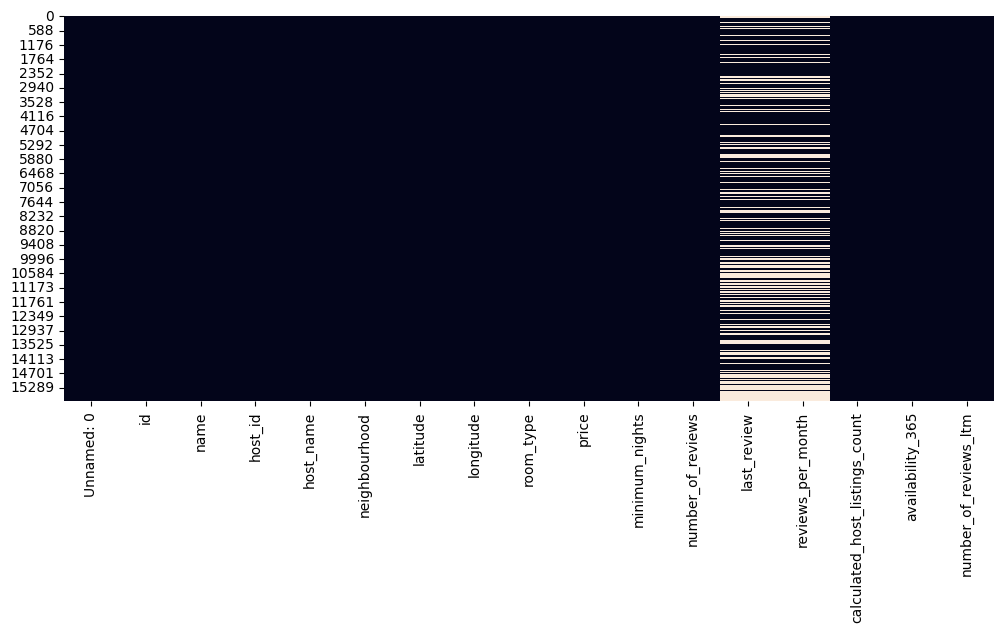

In [16]:
# Visualizing the remaining missing values
plt.figure(figsize=(12, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [17]:
# Verifying whether the missing values in both columns occur in the same rows,
# as the heatmap above suggests that they are aligned in the same rows.
df[(df["last_review"].isna()) & (df["reviews_per_month"].isna())]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


The data filtering process revealed that the missing values in **'last_review'** and **'reviews_per_month'** occur in the same rows, with both columns showing 5,789 missing entries. Additionally, in every instance where these values are missing, the **'number_of_reviews'** column has a value of 0. This indicates that the absence of reviews for these listings is the cause of the missing values in **'last_review'** and **'reviews_per_month'**.

In [18]:
# Checking if the assumption above is true
df[(df["number_of_reviews"] == 0) & (df["last_review"].isna()) & (df["reviews_per_month"].isna())]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


The number of rows remains unchanged at 5,789, confirming that the missing values are indeed due to the absence of reviews in these listings. To address this, the missing values in the **'reviews_per_month'** column can be filled with "0", and for the **'last_review'** column, a default datetime value will be assigned, as this column is expected to be in a datetime format. This approach ensures that the dataset remains consistent and ready for further analysis.

In [19]:
# Convert 'last_review' column from object to datetime
df["last_review"] = pd.to_datetime(df["last_review"], errors="coerce")

# Now, fill the missing values in 'reviews_per_month' with 0
df["reviews_per_month"].fillna(0, inplace=True)

# Fill the missing values in 'last_review' with a default datetime, e.g., '1970-01-01'
df["last_review"].fillna(pd.to_datetime("1970-01-01"), inplace=True)

# Verify the changes by checking for any remaining missing values
df[["last_review", "reviews_per_month"]].isnull().sum().reset_index().rename(columns={"index": "Column", 0: "Missing Values"})

,Column,Missing Values
0,last_review,0
1,reviews_per_month,0


### **Dropping Unnecessary Columns to Have a Clean Dataset**

To streamline the dataset and concentrate on the most relevant information, unnecessary columns that do not contribute to the analysis will be removed. Specifically, the **'Unnamed: 0'**, **'id'**, and **'host_id'** columns will be dropped:

- **Unnamed: 0:** This column typically appears as an index from a previously saved file and does not provide any useful information.
- **id:** Serving as a unique identifier for each listing, this column is not required for the analysis.
- **host_id:** Similar to **id**, this column acts as an identifier for the host but is not necessary for generating insights.

Removing these columns will reduce clutter in the dataset and enhance the efficiency of the analysis.

In [20]:
# Drop unnecessary columns from the dataset
df.drop(columns=["Unnamed: 0", "id", "host_id"], inplace=True)

# Verifyinf if the columns are already dropped or not
df.head()

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Nice room with superb city view,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,"Easy going landlord,easy place",Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,1970-01-01,0.00,2,358,0
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,1970-01-01,0.00,1,365,0
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,1970-01-01,0.00,3,365,0


In [21]:
# Checking the number of rows and columns in the clean dataset
f"The final number of rows and columns are {df.shape}"

'The final number of rows and columns are (15853, 14)'

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15853 entries, 0 to 15853
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            15853 non-null  object        
 1   host_name                       15853 non-null  object        
 2   neighbourhood                   15853 non-null  object        
 3   latitude                        15853 non-null  float64       
 4   longitude                       15853 non-null  float64       
 5   room_type                       15853 non-null  object        
 6   price                           15853 non-null  int64         
 7   minimum_nights                  15853 non-null  int64         
 8   number_of_reviews               15853 non-null  int64         
 9   last_review                     15853 non-null  datetime64[ns]
 10  reviews_per_month               15853 non-null  float64       
 11  calcula

After addressing anomalies, outliers, missing values, and removing unnecessary columns, our dataset now consists of 15,853 rows and 14 columns.

In [23]:
# Save the cleaned dataset to a new CSV file
# df.to_csv('Airbnb Listings Bangkok_clean.csv', index=False)

### **Examining Data Distribution**

Understanding the distribution of data is crucial for several reasons:

1. **Identifying Skewness:** Determines if the data is symmetric or skewed, which impacts the choice of statistical tests and models.
2. **Detecting Outliers:** Helps in spotting outliers that may affect the analysis.
Choosing the Right Model: Some models assume a normal distribution of data, so understanding the distribution helps in model selection.
3. **Data Transformation Needs:** Non-normal data might require transformations for more accurate analysis.

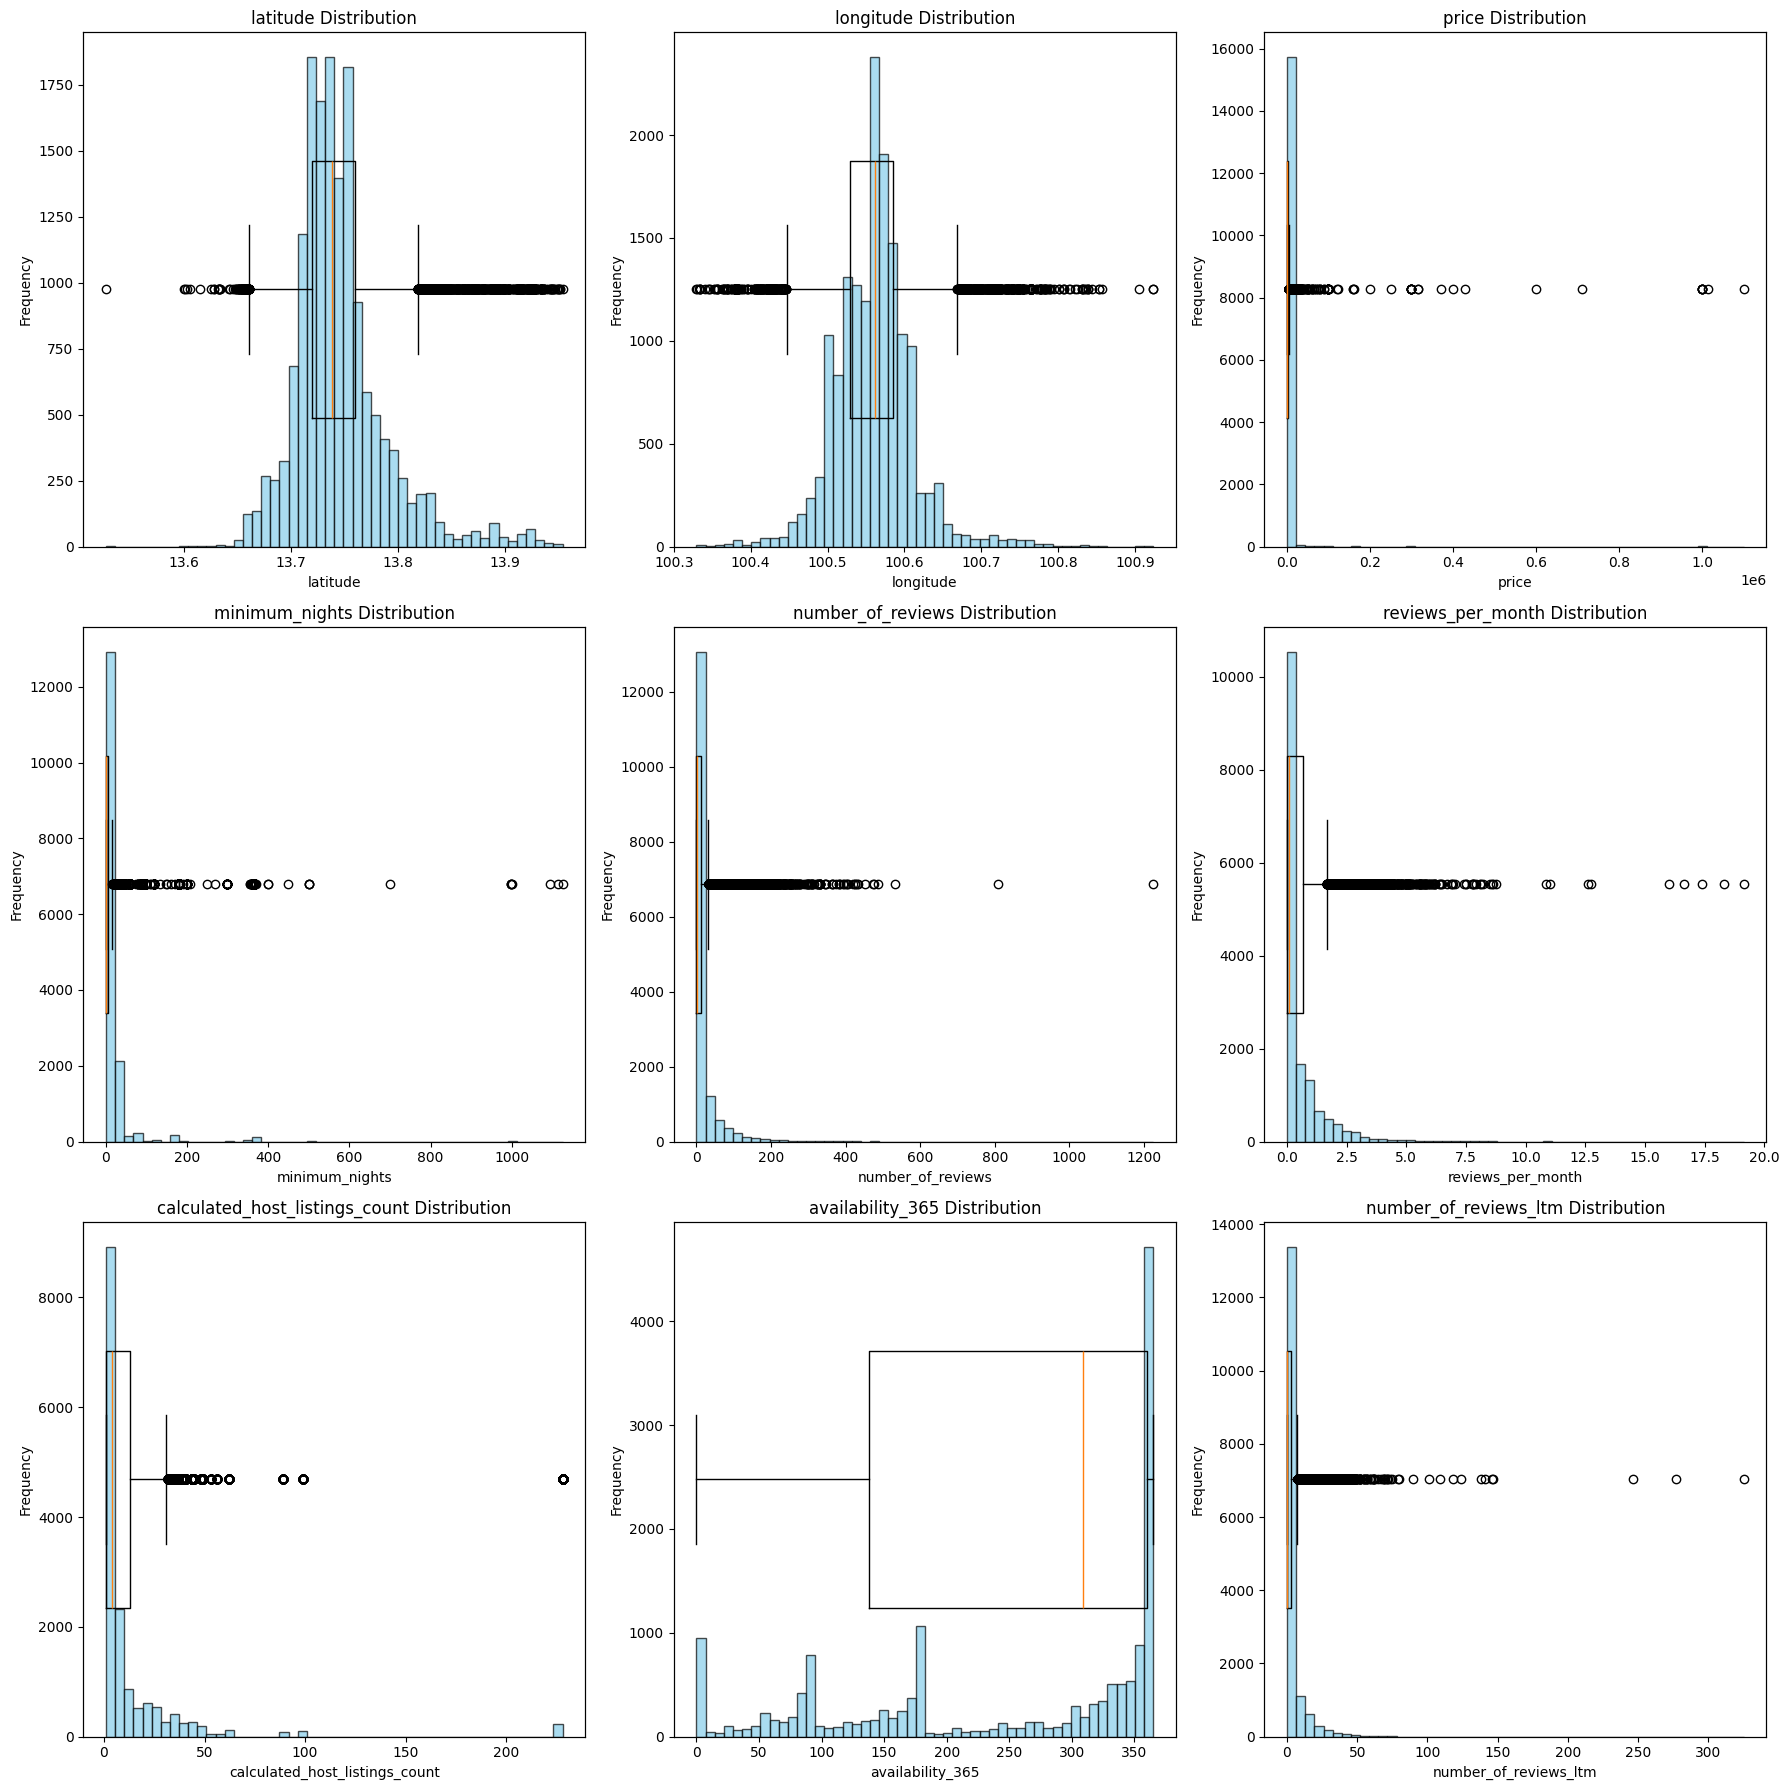

,Shapiro-Wilk Statistic,Shapiro-Wilk p-value,D'Agostino Statistic,D'Agostino p-value,Skewness,Skew Direction,Normally Distributed
latitude,0.90341,0.0,4356.959559,0.0,1.401384,Positive,False
longitude,0.95221,0.0,2077.433462,0.0,0.559228,Positive,False
price,0.044418,0.0,43046.717756,0.0,33.882198,Positive,False
minimum_nights,0.279787,0.0,22190.129178,0.0,8.229398,Positive,False
number_of_reviews,0.441057,0.0,19163.17247,0.0,6.261361,Positive,False
reviews_per_month,0.579128,0.0,15621.035696,0.0,4.628295,Positive,False
calculated_host_listings_count,0.417437,0.0,16474.501173,0.0,5.386583,Positive,False
availability_365,0.832341,0.0,12885.350519,0.0,-0.576219,Negative,False
number_of_reviews_ltm,0.411577,0.0,24895.698981,0.0,9.725723,Positive,False


In [24]:
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

normality_test_results = {}

num_cols = len(numerical_columns)

rows = (num_cols + 2) // 3

plt.figure(figsize=(18, 6 * rows))

for i, col in enumerate(numerical_columns):
    plt.subplot(rows, 3, i + 1)
    
    # Histogram
    plt.hist(df[col], bins=50, color="skyblue", edgecolor="black", alpha=0.7)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    # Box Plot
    plt.twinx()
    plt.boxplot(df[col], vert=False, positions=[0], widths=0.5)
    plt.yticks([])

    # Perform the Shapiro-Wilk Test for normality
    shapiro_test = stats.shapiro(df[col])

    # Perform the D'Agostino's K-squared Test for normality
    dagostino_test = stats.normaltest(df[col])

    # Calculate the skewness
    skewness = df[col].skew()

    # Determine the skew direction
    if skewness > 0:
        skew_direction = "Positive"
    elif skewness < 0:
        skew_direction = "Negative"
    else:
        skew_direction = "None"

    # Storing the results
    normality_test_results[col] = {
        "Shapiro-Wilk Statistic": shapiro_test.statistic,
        "Shapiro-Wilk p-value": shapiro_test.pvalue,
        "D'Agostino Statistic": dagostino_test.statistic,
        "D'Agostino p-value": dagostino_test.pvalue,
        "Skewness": skewness,
        "Skew Direction": skew_direction
    }

plt.tight_layout()
plt.show()

# Convert the dictionary to a DataFrame
normality_results_df = pd.DataFrame(normality_test_results).T

# Adding a column to indicate if the data is normally distributed based on p-values
normality_results_df["Normally Distributed"] = (normality_results_df["Shapiro-Wilk p-value"] > 0.05) & (normality_results_df["D'Agostino p-value"] > 0.05)

normality_results_df

It is evident that none of the numerical data follows a normal distribution.

### **Outliter Analysis**

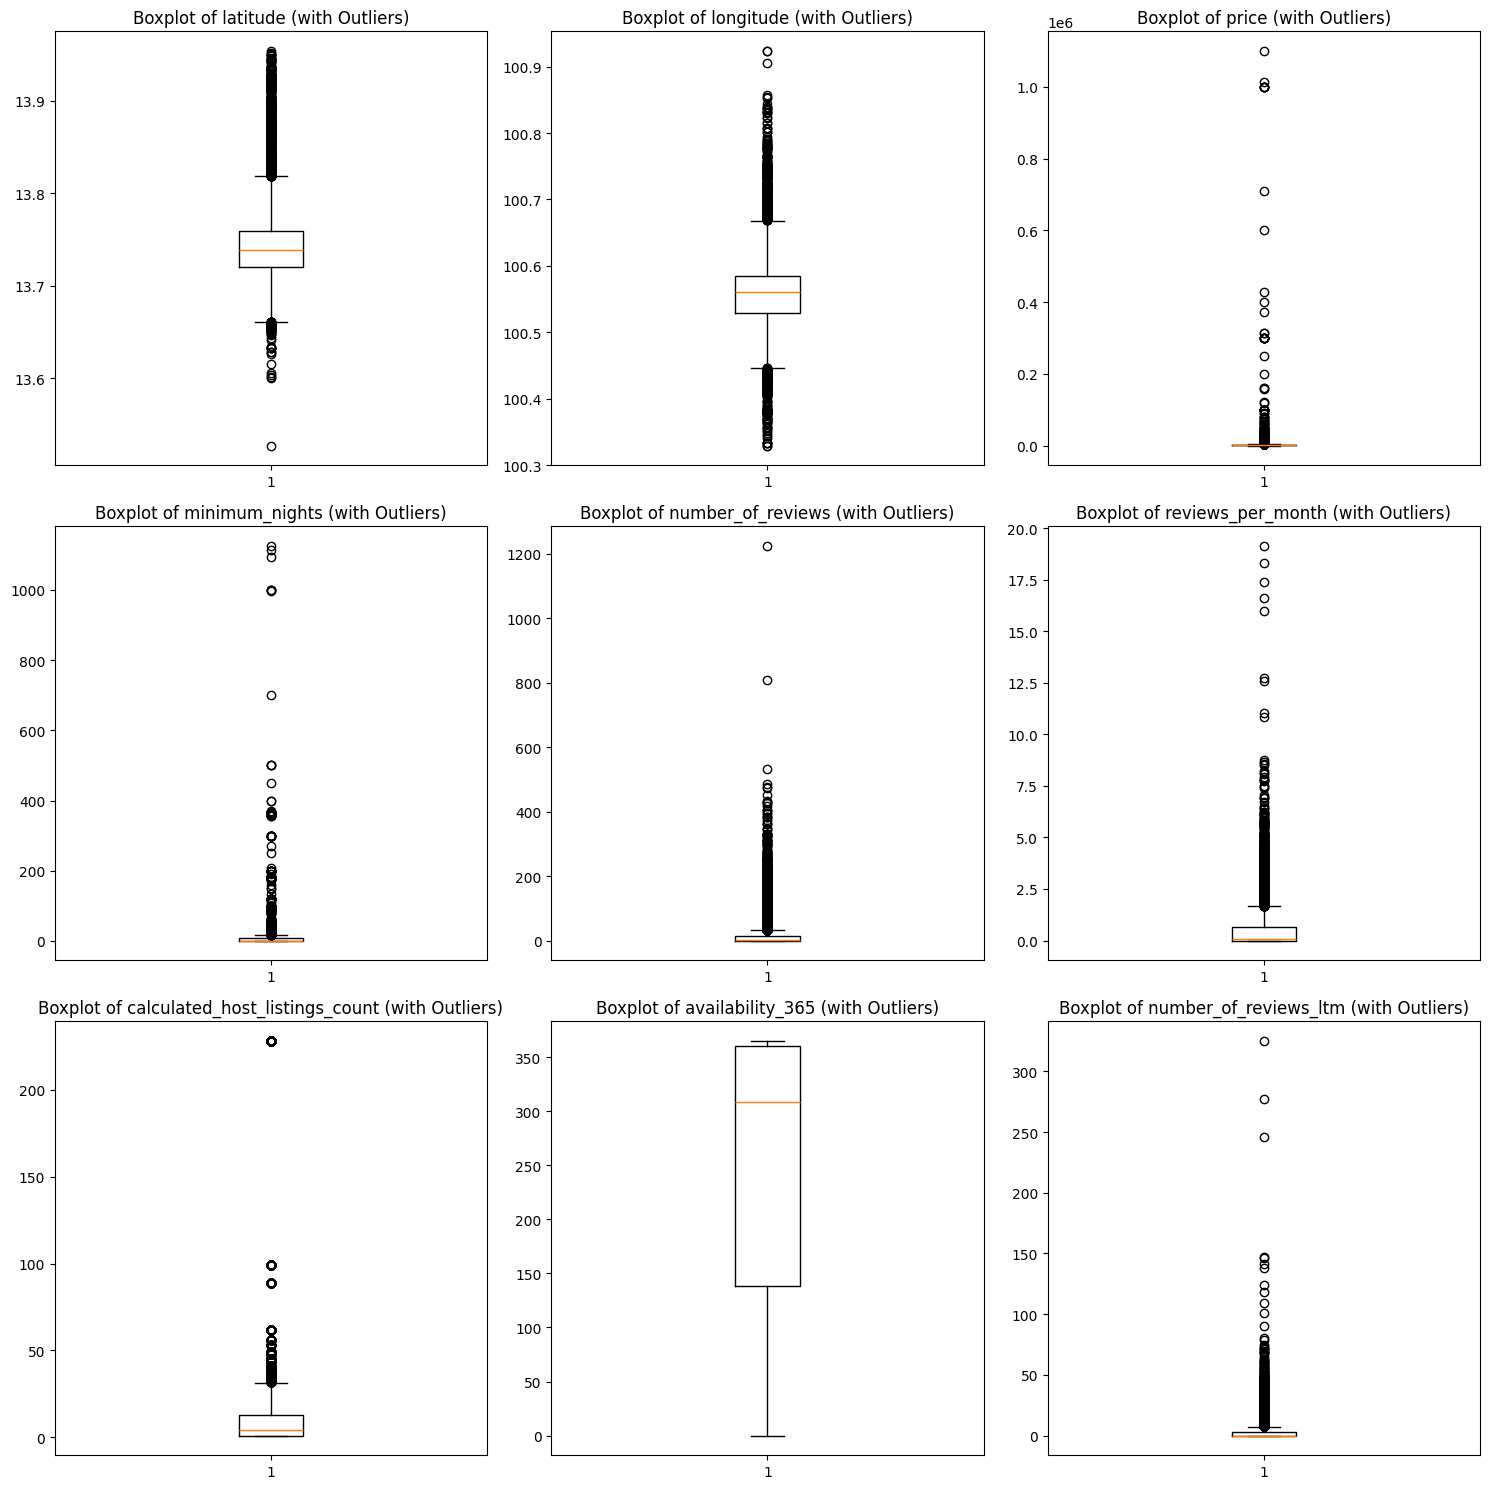

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,latitude,1094,6.900902,13.660975,13.818615
1,longitude,602,3.797389,100.446500,100.668340
2,price,1403,8.850060,-1393.500000,4722.500000
3,minimum_nights,3168,19.983599,-8.000000,16.000000
4,number_of_reviews,2240,14.129818,-19.500000,32.500000
5,reviews_per_month,1471,9.279001,-1.005000,1.675000
6,calculated_host_listings_count,1832,11.556172,-17.000000,31.000000
7,availability_365,0,0.000000,-195.000000,693.000000
8,number_of_reviews_ltm,2219,13.997351,-4.500000,7.500000


In [25]:
outliers_dict = {}

num_cols = 3
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 5, num_rows * 5))
axes = axes.flatten()

summary_data = []

for i, column in enumerate(numerical_columns):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_dict[column] = outliers
    
    total_outliers = outliers.shape[0]
    percentage = (total_outliers / df.shape[0]) * 100
    
    summary_data.append({
        "Column": column,
        "Total Outliers": total_outliers,
        "Percentage (%)": percentage,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound
    })

    axes[i].set_title(f"Boxplot of {column} (with Outliers)")
    axes[i].boxplot(df[column].dropna())

# Hide empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

pd.DataFrame(summary_data)

The outlier analysis revealed significant variances in several important columns. Notably, the **'price'** column has 1,403 outliers, indicating substantial price variability. High outliers were also observed in **'minimum_nights'** (3,168), **'number_of_reviews'** (2,240), and **'calculated_host_listings_count'** (1,832), suggesting significant differences in booking and host behaviors.

These outliers will be addressed in subsequent analyses, where their impact will be evaluated based on the specific context and goals of the study.

## **Data Analysis**

To provide actionable recommendations, a series of analyses will be conducted, including the following:

### **1. Geospatial Competition Analysis**
Visualize the geographic distribution of Airbnb listings across different neighbourhoods in Bangkok to understand competition intensity.

### **2. Seasonal Trends and Pricing Analysis**
Identify and analyze seasonal trends in listing availability and pricing to guide dynamic pricing strategies.

### **3. Optimal Minimum Nights Policy Analysis**
Determine the impact of minimum night stay policies on booking frequency and revenue, and recommend optimal settings.

### **4. Listing Description and Keyword Analysis**
Assess the effectiveness of different keywords, sentiments, and languages used in listing descriptions to optimize for bookings and reviews.

Please refer to the next file for continued analysis.